# Getting netCDF4 Data

Because of Github's file size limit, we couldn't upload this part of tha data; So, the bellow cell download it direcly from our font.

In [2]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/sst.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/rhum.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/slp.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/vwnd.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/wspd.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/cldc.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/air.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/uwnd.mean.nc
# !wget ftp://ftp.cdc.noaa.gov/Datasets/icoads/2degree/enh/sflx.mean.nc

# Cleaning Hurricane Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
%matplotlib inline

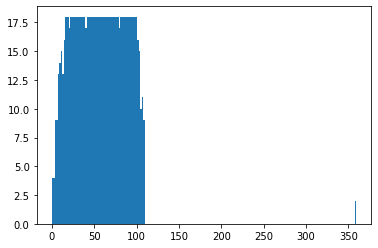

In [2]:
df = pd.read_csv('atlantic.csv')
df2 = pd.read_csv('pacific.csv')

df.head()
lonw = [float(x.rstrip('W')) for x in np.unique(df[df.Longitude.apply(lambda x: x.endswith('W'))].Longitude)]
plt.hist(lonw,bins = 200);

In [3]:
# Formatting latitude and longitude to floats
df.Date = pd.to_datetime(df.Date, format="%Y%m%d")
df["month"] = df["Date"].apply(lambda x: x.month)
df["year"] = df["Date"].apply(lambda x: x.year)
df.Latitude = df.Latitude.apply(lambda x: -float(x.rstrip("S")) if x.endswith("S") else float(x.rstrip("N")))
df.Longitude = df.Longitude.apply(lambda x: -float(x.rstrip("W")) if x.endswith("W") else float(x.rstrip("E")))

df2.Date = pd.to_datetime(df2.Date, format="%Y%m%d")
df2["month"] = df2["Date"].apply(lambda x: x.month)
df2["year"] = df2["Date"].apply(lambda x: x.year)
df2.Latitude = df2.Latitude.apply(lambda x: -float(x.rstrip("S")) if x.endswith("S") else float(x.rstrip("N")))
df2.Longitude = df2.Longitude.apply(lambda x: -float(x.rstrip("W")) if x.endswith("W") else float(x.rstrip("E")))


In [4]:
df.dtypes

ID                          object
Name                        object
Date                datetime64[ns]
Time                         int64
Event                       object
Status                      object
Latitude                   float64
Longitude                  float64
Maximum Wind                 int64
Minimum Pressure             int64
Low Wind NE                  int64
Low Wind SE                  int64
Low Wind SW                  int64
Low Wind NW                  int64
Moderate Wind NE             int64
Moderate Wind SE             int64
Moderate Wind SW             int64
Moderate Wind NW             int64
High Wind NE                 int64
High Wind SE                 int64
High Wind SW                 int64
High Wind NW                 int64
month                        int64
year                         int64
dtype: object

In [5]:
df[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,49105.000000,49105.000000
mean,27.044904,-65.682533
std,10.077880,19.687240
min,7.200000,-359.100000
25%,19.100000,-81.000000
50%,26.400000,-68.000000
75%,33.100000,-52.500000
max,81.000000,63.000000


In [12]:
#Text entries are spaced
np.unique(df.Name)[0:5],np.unique(df.Event),np.unique(df.Status)

(array(['                AMY', '                ANA',
        '                BOB', '                DOG',
        '                DON'], dtype=object),
 array(['  ', ' C', ' G', ' I', ' L', ' P', ' R', ' S', ' T', ' W'],
       dtype=object),
 array([' DB', ' EX', ' HU', ' LO', ' SD', ' SS', ' TD', ' TS', ' WV'],
       dtype=object))

In [28]:
#Formatting text entries

df['Name'] = df['Name'].apply(lambda x: x.strip())
df['Event'] = df['Event'].apply(lambda x: x.strip())
df['Status'] = df['Status'].apply(lambda x: x.strip())

df2['Name'] = df2['Name'].apply(lambda x: x.strip())
df2['Event'] = df2['Event'].apply(lambda x: x.strip())
df2['Status'] = df2['Status'].apply(lambda x: x.strip())

np.unique(df.Name)[0:5],np.unique(df.Event),np.unique(df.Status)

(array(['ABBY', 'ABLE', 'AGNES', 'ALBERTO', 'ALEX'], dtype=object),
 array(['', 'C', 'G', 'I', 'L', 'P', 'R', 'S', 'T', 'W'], dtype=object),
 array(['DB', 'EX', 'HU', 'LO', 'SD', 'SS', 'TD', 'TS', 'WV'], dtype=object))

In [ ]:
# Saving formatted dataframes

df.to_csv("atlantic_new.csv",index=False)
df2.to_csv("pacific_new.csv",index=False)

In [6]:
atlantic = pd.read_csv('atlantic_new.csv')
atlantic.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW', 'month',
       'year'],
      dtype='object')

In [7]:
pd.DataFrame(zip(atlantic.columns,
                 [np.sum(atlantic[x] == -999)/len(atlantic) for x in atlantic.columns])
             ,columns = ['Variable','Missing Ratio'])

,Variable,Missing Ratio
0,ID,0.000000
1,Name,0.000000
2,Date,0.000000
3,Time,0.000000
4,Event,0.000000
5,Status,0.000000
6,Latitude,0.000000
7,Longitude,0.000000
8,Maximum Wind,0.000000
9,Minimum Pressure,0.624560


In [50]:
# df = df.drop(['Low Wind NE',
#        'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
#        'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
#        'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],axis = 1)

In [31]:
df1950 = atlantic[atlantic.year>=1950]
pd.DataFrame(zip(atlantic.columns,
                 [np.sum(df1950[x] == -999)/len(df1950) for x in df1950.columns])
             ,columns = ['Variable','Missing Ratio'])

,Variable,Missing Ratio
0,ID,0.000000
1,Name,0.000000
2,Date,0.000000
3,Time,0.000000
4,Event,0.000000
5,Status,0.000000
6,Latitude,0.000000
7,Longitude,0.000000
8,Maximum Wind,0.000000
9,Minimum Pressure,0.346323


In [64]:
sst_mean = nc.Dataset('sst.mean.nc','r')
rhum_mean = nc.Dataset('rhum.mean.nc','r')
wspd_mean = nc.Dataset('wspd.mean.nc','r')
slp_mean = nc.Dataset('slp.mean.nc','r')
# vwnd_mean = nc.Dataset('Datasets/vwnd.mean.nc','r')
cldc_mean = nc.Dataset("cldc.mean.nc",'r')

lats = sst_mean.variables['lat'][:]
lons = sst_mean.variables['lon'][:]
time = sst_mean.variables['time'][:]

lons = [x-180 for x in lons]
lats = [x for x in lats]

sst = sst_mean.variables['sst'][:,:,:]
rhum = rhum_mean.variables['rhum'][:,:,:]
wspd = wspd_mean.variables['wspd'][:,:,:]
slp = slp_mean.variables['slp'][:,:,:]
# vwnd = vwnd_mean.variables['vwnd'][:,:,:]
cldc = cldc_mean.variables['cldc'][:,:,:]

sst_mean.close()
wspd_mean.close()
rhum_mean.close()
slp_mean.close()
# vwnd_mean.close()
cldc_mean.close()

In [65]:
from math import sin, cos, sqrt, atan2, radians
def distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6371.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [155]:
def get_coord(coord,l):
    if int(coord) in l:
        return int(coord)
    elif int(coord)+1 in l:
        return int(coord)+1
    elif int(coord)-1 in l:
        return int(coord)-1
    elif int(coord)+2 in l:
        return int(coord)+2
    elif int(coord)-2 in l:
        return int(coord)-2
    
def get_neighboors(t,lat,lon,marray,k):
    nb = []
    dist = []
    lat_data = get_coord(lat,lats) #nearest lat in our lats list
    lon_data = get_coord(lon,lons)
    lat_i = lats.index(lat_data)
    lon_i = lons.index(lon_data)
    if marray[t,lat_i,lon_i]:
        nb.append(marray[t,lat_i,lon_i])
        dist.append(distance(lat,lon,lat_data,lon_data))
    j=1
    while len(nb)<k:
        
        lower_i = lat_i-j
        upper_i = lat_i+j
        right_i = lon_i+j
        left_i = lon_i-j
#         if right_i>=len()
        left_values = marray[t,lower_i:upper_i,left_i]
        upper_values = marray[t,upper_i,left_i:right_i]
        right_values = marray[t,upper_i:lower_i:-1,right_i]
        lower_values = marray[t,lower_i,right_i:left_i:-1]
        
        [nb.append(x) for x in left_values if x]
        [dist.append(distance(lat,lon,lats[i],lons[left_i])) for i in range(len(left_values)) if left_values[i]]
        if len(nb)>=k:
            break
        [nb.append(x) for x in upper_values if x]
        [dist.append(distance(lat,lon,lats[upper_i],lons[i])) for i in range(len(upper_values)) if upper_values[i]]
        if len(nb)>=k:
            break
        [nb.append(x) for x in right_values if x]
        [dist.append(distance(lat,lon,lats[i],lons[right_i])) for i in range(len(right_values)) if right_values[i]]
        if len(nb)>=k:
            break
        [nb.append(x) for x in lower_values if x]
        [dist.append(distance(lat,lon,lats[lower_i],lons[i])) for i in range(len(lower_values)) if lower_values[i]]
        if len(nb)>=k:
            break
        j+=1
    return nb,dist
        
        

In [172]:
period = pd.date_range(start = "1800-01-01",end = "2020-07-01", freq = "MS").to_pydatetime().tolist()
def get_data(datetime,lat,lon,dataset,k):#k is the number of neighboors
    year = datetime.year
    month = datetime.month
    time_index = period.index(dt.datetime(year, month, 1, 0, 0))
    nb,dist = get_neighboors(time_index,lat,lon,dataset,k)
    inv_dist = [1/x for x in dist if x!=0]
    for x in dist:
        if x==0:
            nb.pop(dist.index(x))
#     print(sum([x==0 for x in inv_dist])/len(inv_dist))
    return sum(nb[i]*inv_dist[i] for i in range(len(nb)))/sum(inv_dist)

In [173]:
def get_data_df(df,dataset,label,k=30):
    output = pd.DataFrame(np.zeros([len(df),1]),columns = [label])
    for i in range(len(df)):
        output.loc[i,1] = get_data(df.Date[i],df.Latitude[i],df.Longitude[i],dataset,k)
    return output

In [174]:
df['sst'] = get_data_df(df,sst,'sst')
# # df.Date[0].year()
# # df.columns
# # if sst[1800,50,50]:
# #     print('true')
# get_data(df.Date[2],df.Latitude[2],df.Longitude[2],sst)

ValueError: None is not in list

In [153]:
# pd.DataFrame(np.zeros([40,1]),columns =['test'])
len(df)
sst.shape

(2647, 90, 180)

[-179.0,
 -177.0,
 -175.0,
 -173.0,
 -171.0,
 -169.0,
 -167.0,
 -165.0,
 -163.0,
 -161.0,
 -159.0,
 -157.0,
 -155.0,
 -153.0,
 -151.0,
 -149.0,
 -147.0,
 -145.0,
 -143.0,
 -141.0,
 -139.0,
 -137.0,
 -135.0,
 -133.0,
 -131.0,
 -129.0,
 -127.0,
 -125.0,
 -123.0,
 -121.0,
 -119.0,
 -117.0,
 -115.0,
 -113.0,
 -111.0,
 -109.0,
 -107.0,
 -105.0,
 -103.0,
 -101.0,
 -99.0,
 -97.0,
 -95.0,
 -93.0,
 -91.0,
 -89.0,
 -87.0,
 -85.0,
 -83.0,
 -81.0,
 -79.0,
 -77.0,
 -75.0,
 -73.0,
 -71.0,
 -69.0,
 -67.0,
 -65.0,
 -63.0,
 -61.0,
 -59.0,
 -57.0,
 -55.0,
 -53.0,
 -51.0,
 -49.0,
 -47.0,
 -45.0,
 -43.0,
 -41.0,
 -39.0,
 -37.0,
 -35.0,
 -33.0,
 -31.0,
 -29.0,
 -27.0,
 -25.0,
 -23.0,
 -21.0,
 -19.0,
 -17.0,
 -15.0,
 -13.0,
 -11.0,
 -9.0,
 -7.0,
 -5.0,
 -3.0,
 -1.0,
 1.0,
 3.0,
 5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.0,
 17.0,
 19.0,
 21.0,
 23.0,
 25.0,
 27.0,
 29.0,
 31.0,
 33.0,
 35.0,
 37.0,
 39.0,
 41.0,
 43.0,
 45.0,
 47.0,
 49.0,
 51.0,
 53.0,
 55.0,
 57.0,
 59.0,
 61.0,
 63.0,
 65.0,
 67.0,
 69.0,
 71.0